In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
from IPython.display import HTML
import geopandas as gpd
from fiona.crs import from_epsg
from shapely.geometry import Point
import os
import seaborn
%pylab inline

import statsmodels.formula.api as smf

import seaborn as sns
sns.set_style('whitegrid')


Populating the interactive namespace from numpy and matplotlib


C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
import laspy
from laspy.file import File
import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata

In [19]:
data15 = File('a.las', mode='r')
data15.read
points15 = np.array([data15.x, data15.y]).T
points15

array([[ 316285.01170923,  233454.48233112],
       [ 316285.11170923,  233455.15133112],
       [ 316285.37170923,  233456.89933112],
       ..., 
       [ 316283.54870923,  233452.72433112],
       [ 316283.57770923,  233452.87133112],
       [ 316283.58770923,  233452.26033112]])

## Defining the grid

In [201]:
grid_x, grid_y = np.mgrid[data15.x.min() : data15.x.max() : 0.01, data15.y.min() : data15.y.max() : 0.01]

In [21]:
grid_y

array([[ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112],
       [ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112],
       [ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112],
       ..., 
       [ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112],
       [ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112],
       [ 233445.67033112,  233445.68033112,  233445.69033112, ...,
         233460.64033112,  233460.65033112,  233460.66033112]])

## Creat a grid of Z (height) values

In [22]:
grid_z15 = griddata(points15, data15.z, (grid_x, grid_y), method = 'nearest')

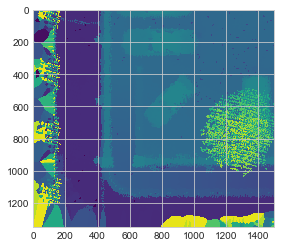

In [23]:
plt.imshow(grid_z15, cmap='viridis')
plt.show()

In [24]:
data07 = File('2007.las', mode='r')
data07.read
points07 = np.array([data07.x, data07.y]).T
points07

array([[ 316285.27435828,  233460.60167551],
       [ 316285.25835828,  233460.56667551],
       [ 316285.28035828,  233460.52467551],
       ..., 
       [ 316272.11735828,  233458.02467551],
       [ 316272.03035828,  233457.51267551],
       [ 316271.94135828,  233457.00867551]])

In [25]:
grid_z07 = griddata(points07, data07.z, (grid_x, grid_y), method = 'nearest')

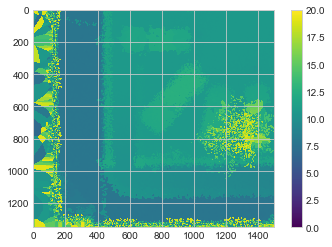

In [273]:
plt.imshow(grid_z07, cmap='viridis')
plt.clim(vmin=0,vmax=20)
plt.colorbar()

## Grid of change of Z values

In [27]:
change = np.abs(grid_z15 - grid_z07)
change

array([[  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       [  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       [  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       ..., 
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04],
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04],
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04]])

In [28]:
change.shape

(1352L, 1500L)

In [29]:
change.std()

2.2035707362848043

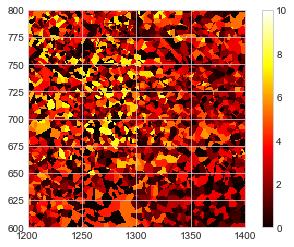

In [271]:
plt.imshow(change, cmap='hot')
plt.ylim(600,800)
plt.xlim(1200,1400)
plt.clim(vmin=0,vmax=10)
plt.colorbar()


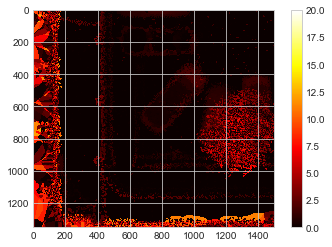

In [274]:
plt.imshow(change, cmap='hot')
plt.clim(vmin=0,vmax=20)
plt.colorbar()

In [ ]:
plt.imshow(change, cmap='hot')

In [33]:
change.shape

(1352L, 1500L)

In [97]:
change

array([[  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       [  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       [  9.27356250e+00,   9.27356250e+00,   9.27356250e+00, ...,
          2.35625000e-02,   2.35625000e-02,   2.35625000e-02],
       ..., 
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04],
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04],
       [  2.60143750e+00,   2.60143750e+00,   2.60143750e+00, ...,
          5.62500000e-04,   5.62500000e-04,   5.62500000e-04]])

In [104]:
from scipy.ndimage.filters import uniform_filter

In [83]:
#difchange=change-(change.mean()+change.std())
#difchange = difchange.clip(min=0)
#plt.imshow(difchange, cmap='Blues_r',)

In [133]:
print change.mean()
print change.std()

1.06224854561
2.20357073628


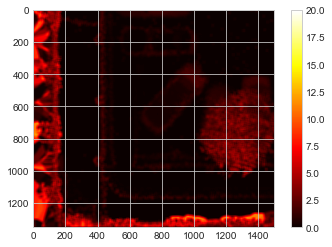

In [277]:
#plt.figure(figsize=(10,10))
change_smooth=uniform_filter(change, size=(20), mode='constant')
plt.imshow(change_smooth, cmap='hot')
plt.clim(vmin=0,vmax=20)
plt.colorbar()


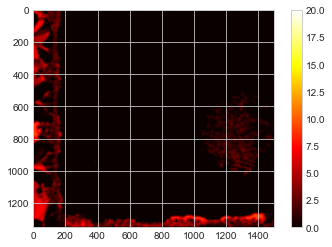

In [278]:
difchange=(change_smooth-(change_smooth.mean()+0.5*change_smooth.std()))
difchange = difchange.clip(min=0)
plt.imshow(difchange, cmap='hot')
plt.clim(vmin=0,vmax=20)
plt.colorbar()

In [166]:
change_smooth.mean()+0.5*change_smooth.std()

1.9169744606417347

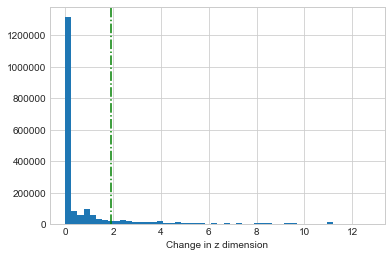

In [188]:
flat=change.reshape((1352*1500))
plt.hist(flat,bins=50);
plt.axvline(x=change_smooth.mean()+0.5*change_smooth.std(), color='g', linestyle='-.')
plt.xlabel("Change in z dimension");

In [223]:

#crane15 = File('2015crane.las', mode='r')
#crane07=File('2007crane.las', mode='r')
#crane15=File('2007crop.las', mode='r')
crane15=File('2015crop.las', mode='r')

In [224]:
cranepoints15=np.array([crane15.x, crane15.y]).T

In [225]:
crane_z15 = griddata(cranepoints15, crane15.z, (grid_x, grid_y), method = 'nearest')

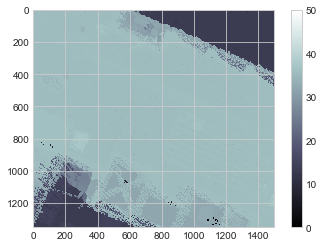

In [287]:
plt.imshow(crane_z15, cmap='bone')
plt.clim(vmin=0,vmax=50)
plt.colorbar()


In [227]:
crane15=File('2007crop.las', mode='r')

In [228]:
cranepoints15=np.array([crane15.x, crane15.y]).T

In [229]:
crane_z07 = griddata(cranepoints15, crane15.z, (grid_x, grid_y), method = 'nearest')

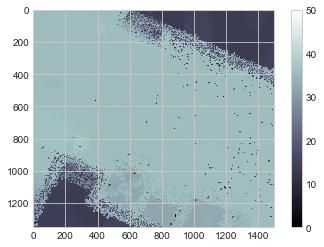

In [288]:
plt.imshow(crane_z07, cmap='bone')
plt.clim(vmin=0,vmax=50)
plt.colorbar()

In [231]:
diff=crane_z15-crane_z07

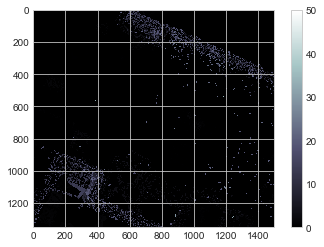

In [289]:
#plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='bone')
plt.clim(vmin=0,vmax=50)
plt.colorbar()

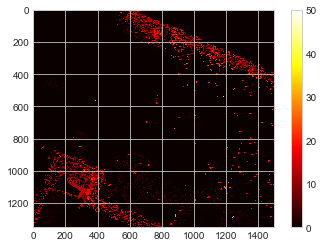

In [290]:
diff_smooth=uniform_filter(diff, size=(30), mode='constant')

plt.imshow(diff, cmap='hot')
plt.clim(vmin=0,vmax=50)
plt.colorbar()

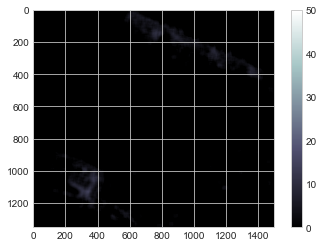

In [292]:
difffffchange=(diff_smooth-(change_smooth.mean()+0.5*change_smooth.std()))
difffffchange = difffffchange.clip(min=0)
plt.imshow(difffffchange, cmap='bone');
plt.clim(vmin=0,vmax=50)
plt.colorbar()